In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes


In [2]:
x,y=load_diabetes(return_X_y=True)

* Data Spliting

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

* Linear Regression Model

In [50]:
reg=LinearRegression()
reg.fit(x_train,y_train)

print('Coefficient:',reg.coef_,'\n')
print('Intercept:',reg.intercept_,'\n')

y_predict=reg.predict(x_test)
print('R2_score',r2_score(y_test,y_predict),'\n')

print('MSE',mean_squared_error(y_test,y_predict))

Coefficient: [ -30.62168241 -272.25451707  528.84444333  327.70269026 -581.01413007
  332.96286278  -27.97606192  139.28448979  665.07521004   61.90596378] 

Intercept: 151.43006895898006 

R2_score 0.43843604017332694 

MSE 2992.5576814529445


# Batch Gradient Descent

In [34]:
class BGD_Regressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,x_train,y_train) :
         self.intercept_=0
         self.coef_=np.ones(x_train.shape[1])

         for i in range(self.epochs):
            y_pred=np.dot(x_train,self.coef_)+ self.intercept_

            intercept_der= -2*np.mean(y_train-y_pred)
            self.intercept_= self.intercept_ -(self.lr*intercept_der)

            coef_der= -2*np.dot((y_train-y_pred),x_train)/x_train.shape[0]
            self.coef_ = self.coef_ -(self.lr * coef_der)  

    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_ 

In [60]:
BGDR=BGD_Regressor(epochs=1000,learning_rate=0.5)
BGDR.fit(x_train,y_train)

print('Intercept',BGDR.intercept_)
print('Coefficients',BGDR.coef_)

print('-----------------------------------------------------------------------')
y_pred_B= BGDR.predict(x_test)

print('R2_score:',r2_score(y_test,y_pred),'\n')

print('MSE',mean_squared_error(y_test,y_pred))


Intercept 151.4007040929131
Coefficients [  -6.32556083 -224.53785581  501.48057374  300.54528645  -39.16554298
 -100.51280512 -225.75353793  133.46531286  399.54631964  111.08711106]
-----------------------------------------------------------------------
R2_score: 0.43332465352378335 

MSE 3019.7961092638907


# Stochastic Gradient Descent

In [31]:
class SGD_Regressor:
    def __init__ (self,learning_rate=0.01,epochs=100):

        self.coef_ =None
        self.intercept_ =None
        self.lr =learning_rate
        self.epochs =epochs
    
    def fit(self,x_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(x_train.shape[0]):
                idx = np.random.randint(0,x_train.shape[0])

                y_pred= np.dot(x_train[idx],self.coef_)+self.intercept_

                intercept_der = -2 * (y_train[idx] - y_pred)
                self.intercept_ =self.intercept_ -(self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_pred),x_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_

In [59]:
SGDR= SGD_Regressor(learning_rate=0.01,epochs=100)
SGDR.fit(x_train,y_train)

print('Intercept',SGDR.intercept_)
print('Coefficients',SGDR.coef_)

print('-----------------------------------------------------------------------')
y_pred_S= SGDR.predict(x_test)

print('R2_score:',r2_score(y_test,y_pred),'\n')

print('MSE',mean_squared_error(y_test,y_pred))



Intercept 147.09626630670016
Coefficients [  11.95002123 -186.82027415  462.41748249  277.99963944  -26.61506574
  -80.09747619 -222.33783565  144.7939354   363.84169781  128.23217542]
-----------------------------------------------------------------------
R2_score: 0.43332465352378335 

MSE 3019.7961092638907


# Mini-Batch Gradient Descent

In [45]:
import random

class MBGDRegressor:
    
    def __init__(self,batch_size,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        
    def fit(self,x_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            
            for j in range(int(x_train.shape[0]/self.batch_size)):
                
                idx = random.sample(range(x_train.shape[0]),self.batch_size)
                
                y_pred = np.dot(x_train[idx],self.coef_) + self.intercept_
            
                intercept_der = -2 * np.mean(y_train[idx] - y_pred)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_pred),x_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
    
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_

In [57]:
MBGDR = MBGDRegressor(batch_size=int(x_train.shape[0]/50),learning_rate=0.01,epochs=100)
MBGDR.fit(x_train,y_train)

print('Intercept',MBGDR.intercept_)
print('Coefficients',MBGDR.coef_)

print('-----------------------------------------------------------------------')
y_pred_M= MBGDR.predict(x_test)

print('R2_score:',r2_score(y_test,y_pred),'\n')

print('MSE',mean_squared_error(y_test,y_pred))


Intercept 153.31878457145814
Coefficients [   4.94689133 -188.47626718  464.0251281   279.08404862  -28.67855059
  -85.70230962 -220.86108322  144.33712494  370.5847053   133.32246397]
-----------------------------------------------------------------------
R2_score: 0.43332465352378335 

MSE 3019.7961092638907


* Graphical Representation

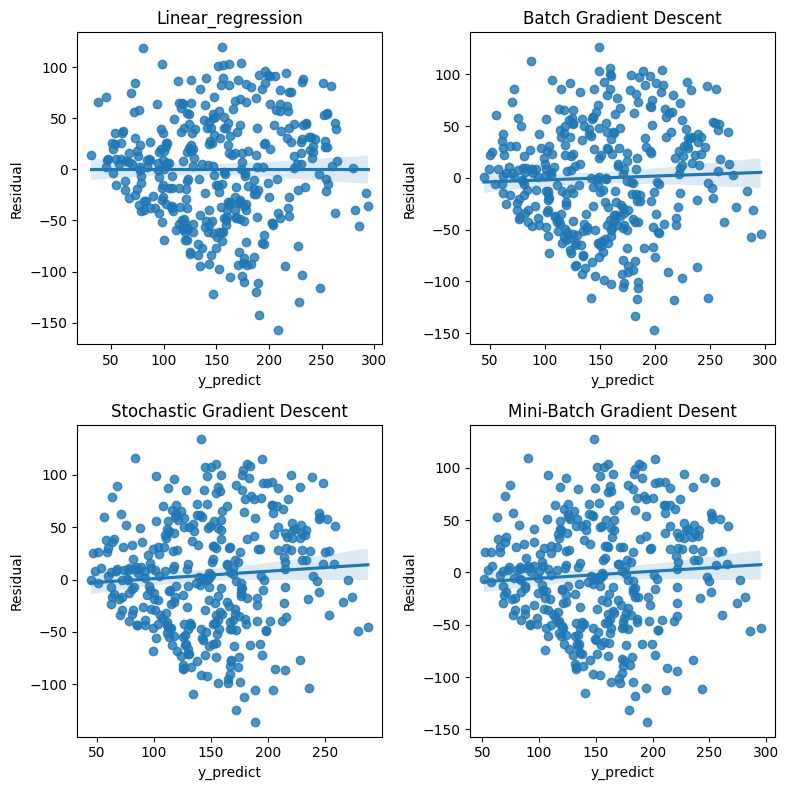

In [89]:
y_lm_pred=reg.predict(x_train)
y_B_pred=BGDR.predict(x_train)
y_S_pred=SGDR.predict(x_train)
y_MB_pred=MBGDR.predict(x_train)

fig, axes = plt.subplots(2, 2, figsize=(8, 8)) 
sns.regplot(y_lm_pred,(y_train-y_lm_pred),ax=axes[0,0])
axes[0,0].set_title('Linear_regression')
axes[0,0].set_xlabel('y_predict')
axes[0,0].set_ylabel('Residual')

sns.regplot(y_B_pred,(y_train-y_B_pred),ax=axes[0,1])
axes[0,1].set_title('Batch Gradient Descent')
axes[0,1].set_xlabel('y_predict')
axes[0,1].set_ylabel('Residual')


sns.regplot(y_S_pred,(y_train-y_S_pred),ax=axes[1,0])
axes[1,0].set_title('Stochastic Gradient Descent')
axes[1,0].set_xlabel('y_predict')
axes[1,0].set_ylabel('Residual')


sns.regplot(y_MB_pred,(y_train-y_MB_pred),ax=axes[1,1])
axes[1,1].set_title('Mini-Batch Gradient Desent')
axes[1,1].set_xlabel('y_predict')
axes[1,1].set_ylabel('Residual')


plt.tight_layout()